In [1]:


import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import random


In [2]:
x_train = np.array([[88, 78], [64, 92], [57, 70], [88, 68], [72, 60], [60, 73], [85, 89], [73, 52], [71, 51], [73, 93], [79, 87], [51, 70], [82, 61], [71, 93], [74, 98], [76, 91], [77, 65], [64, 96], [93, 52], [86, 56], [70, 58], [88, 67], [53, 74], [63, 99], [58, 75], [51, 69], [77, 96], [56, 93], [57, 96], [84, 63], [66, 85], [99, 89], [53, 51], [55, 91], [53, 78], [67, 75], [93, 83], [59, 85], [63, 80], [97, 64], [57, 63], [72, 89], [70, 65], [94, 67], [96, 73], [75, 74], [94, 90], [78, 64], [94, 50], [74, 56], [58, 73], [50, 93], [57, 73], [60, 66], [57, 84], [84, 82], [54, 91], [88, 90], [77, 56], [58, 57], [61, 83], [82, 97], [72, 73], [86, 84], [93, 89], [71, 76], [84, 50], [84, 86], [96, 63], [52, 50], [54, 75], [63, 88], [76, 58], [64, 64], [75, 91], [62, 81], [88, 98], [81, 53], [79, 86], [72, 88], [94, 64], [92, 78], [85, 62], [81, 56], [71, 77], [51, 91], [94, 55], [77, 77], [93, 93], [69, 79], [60, 77], [74, 88], [82, 50], [76, 62], [90, 52], [88, 55], [57, 76], [58, 86], [82, 91], [93, 73]]
)

y_train = np.array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])
                
                   
"""
This dataset represents 100 students' scores on two exams (X_train) and their corresponding admission decisions (y_train), where 0 indicates not admitted and 1 indicates admitted.
"""

print(x_train.shape, y_train.shape)

print(np.where(x_train == [52, 50]))
print(x_train[69])
print(y_train[69])
y_train[69] = 0
print(y_train[69])
print(x_train[:, 0])
m,n = x_train.shape
print(m)

(100, 2) (100,)
(array([48, 66, 69, 69, 92]), array([1, 1, 0, 1, 1]))
[52 50]
1
0
[88 64 57 88 72 60 85 73 71 73 79 51 82 71 74 76 77 64 93 86 70 88 53 63
 58 51 77 56 57 84 66 99 53 55 53 67 93 59 63 97 57 72 70 94 96 75 94 78
 94 74 58 50 57 60 57 84 54 88 77 58 61 82 72 86 93 71 84 84 96 52 54 63
 76 64 75 62 88 81 79 72 94 92 85 81 71 51 94 77 93 69 60 74 82 76 90 88
 57 58 82 93]
100


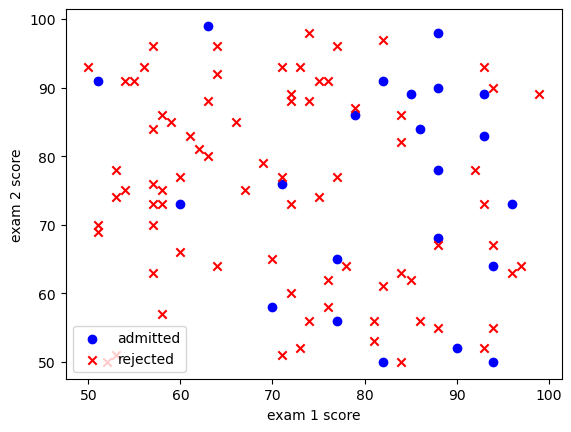

In [3]:
# Separate X_train into accepted and not accepted based on y_train
accepted = x_train[y_train == 1]
not_accepted = x_train[y_train == 0]


plt.scatter(accepted[:, 0], accepted[:, 1], color = "blue", marker = "o", label = "admitted")
plt.scatter(not_accepted[:, 0], not_accepted[:, 1], color = "red", marker = "x", label = "rejected")
plt.xlabel("exam 1 score")
plt.ylabel("exam 2 score")
plt.legend(loc = "lower left")
plt.show()

In [4]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

test = np.array([random.randint(-20,20) for i in range(20)])

print(f"sigmoid({test}) = {sigmoid(test)}")

0 in sigmoid(test)

sigmoid([-12   8   2 -18   2 -19   0 -17   0  14  -6   5  -1  16 -17 -15   4 -13
   2  14]) = [6.14417460e-06 9.99664650e-01 8.80797078e-01 1.52299795e-08
 8.80797078e-01 5.60279641e-09 5.00000000e-01 4.13993755e-08
 5.00000000e-01 9.99999168e-01 2.47262316e-03 9.93307149e-01
 2.68941421e-01 9.99999887e-01 4.13993755e-08 3.05902227e-07
 9.82013790e-01 2.26032430e-06 8.80797078e-01 9.99999168e-01]


False

In [5]:
wi = np.array([0.0000001, -0.0000001])
b = 5



def compute_cost(x,y,wi,b, sigmoid):
    z = x@wi
    z_b = z + np.array([b for i in range(len(z))])
    f = sigmoid(z_b)
    f = np.clip(f, 1e-10, 1-1e-10) # makes sure that numbers that are too similar to 0 or 
    def L(f, y):
        l = -(y*np.log10(f)) - ((1-y)*(np.log10(1-f)))
        return l
    m = len(x)
    J = sum([L(f[i], y[i]) for i in range(0, m)])
    return 1/m * J

compute_cost(x_train, y_train, wi, b, sigmoid)

print(compute_cost(x_train, y_train, wi, b, sigmoid))

    

1.6966647996316295


In [6]:
z = x_train@wi
z_b = z + np.array([b for i in range(len(z))])
f = sigmoid(z_b)
print(z)
print(z_b)
print(f)



        



def compute_gradient(x, y, w, b, sigmoid):
    z = x@wi
    z_b = z + np.array([b for i in range(len(z))])
    f = sigmoid(z_b)
    
    m, n = x.shape
    
    djdw = []
    for j in range(n):
        a = 1/m * sum([(f[i] - y[i])*x[i, j] for i in range(m)])
        djdw.append(a)
    djdb = 1/m * sum([(f[i] - y[i]) for i in range(m)])
    
    return djdw, djdb


ggg = compute_gradient(x_train, y_train, wi, b, sigmoid)
print(ggg[0][0])


[ 1.0e-06 -2.8e-06 -1.3e-06  2.0e-06  1.2e-06 -1.3e-06 -4.0e-07  2.1e-06
  2.0e-06 -2.0e-06 -8.0e-07 -1.9e-06  2.1e-06 -2.2e-06 -2.4e-06 -1.5e-06
  1.2e-06 -3.2e-06  4.1e-06  3.0e-06  1.2e-06  2.1e-06 -2.1e-06 -3.6e-06
 -1.7e-06 -1.8e-06 -1.9e-06 -3.7e-06 -3.9e-06  2.1e-06 -1.9e-06  1.0e-06
  2.0e-07 -3.6e-06 -2.5e-06 -8.0e-07  1.0e-06 -2.6e-06 -1.7e-06  3.3e-06
 -6.0e-07 -1.7e-06  5.0e-07  2.7e-06  2.3e-06  1.0e-07  4.0e-07  1.4e-06
  4.4e-06  1.8e-06 -1.5e-06 -4.3e-06 -1.6e-06 -6.0e-07 -2.7e-06  2.0e-07
 -3.7e-06 -2.0e-07  2.1e-06  1.0e-07 -2.2e-06 -1.5e-06 -1.0e-07  2.0e-07
  4.0e-07 -5.0e-07  3.4e-06 -2.0e-07  3.3e-06  2.0e-07 -2.1e-06 -2.5e-06
  1.8e-06  0.0e+00 -1.6e-06 -1.9e-06 -1.0e-06  2.8e-06 -7.0e-07 -1.6e-06
  3.0e-06  1.4e-06  2.3e-06  2.5e-06 -6.0e-07 -4.0e-06  3.9e-06  0.0e+00
  0.0e+00 -1.0e-06 -1.7e-06 -1.4e-06  3.2e-06  1.4e-06  3.8e-06  3.3e-06
 -1.9e-06 -2.8e-06 -9.0e-07  2.0e-06]
[5.000001  4.9999972 4.9999987 5.000002  5.0000012 4.9999987 4.9999996
 5.0000021 5.00

In [7]:
def grad_desc(x, y, wi, bi, sigmoid, compute_cost, compute_gradient, iterat, alpha):
    
    w = wi
    b = bi
    J_his = []
    grad_his = []
    w_his = []
    i, j = x.shape
    print(i, j)
    
    for it in range(iterat):
        J_his.append(compute_cost(x,y,w,b,sigmoid))
        w_his.append(w)
        print(f"'w' that is fead to ggg: {w}")
        ggg = compute_gradient(x_train, y_train, w, b, sigmoid)
        grad_his.append(ggg)
        
        for z in range(j):
            print(w)
            print(w[z])
            print(ggg[0][z])
            w[z] = w[z] - alpha*ggg[0][z]
            
        b = b - alpha*ggg[1]
        
    return w, J_his, w_his, grad_his

grad_desc(x_train, y_train, wi, b, sigmoid, compute_cost, compute_gradient, 1000, 0.01)

    
    

#have not yet implemented regularization

100 2
'w' that is fead to ggg: [ 1.e-07 -1.e-07]
[ 1.e-07 -1.e-07]
1e-07
55.10774089435425
[-5.51077309e-01 -1.00000000e-07]
-1e-07
57.83823673541797
'w' that is fead to ggg: [-0.55107731 -0.57838247]
[-0.55107731 -0.57838247]
-0.5510773089435426
-17.95
[-0.37157731 -0.57838247]
-0.5783824673541796
-16.63
'w' that is fead to ggg: [-0.37157731 -0.41208247]
[-0.37157731 -0.41208247]
-0.3715773089435426
-17.95
[-0.19207731 -0.41208247]
-0.41208246735417964
-16.63
'w' that is fead to ggg: [-0.19207731 -0.24578247]
[-0.19207731 -0.24578247]
-0.19207730894354258
-17.94999996974017
[-0.01257731 -0.24578247]
-0.24578246735417963
-16.62999997092675
'w' that is fead to ggg: [-0.01257731 -0.07948247]
[-0.01257731 -0.07948247]
-0.012577309246140894
-4.504961198891185
[ 0.0324723  -0.07948247]
-0.07948246764491212
-5.100783571287135
'w' that is fead to ggg: [ 0.0324723  -0.02847463]
[ 0.0324723  -0.02847463]
0.03247230274277096
55.17436055646099
[-0.5192713  -0.02847463]
-0.028474631932040778
57.82

'w' that is fead to ggg: [ 0.20864062 -0.19411596]
[ 0.20864062 -0.19411596]
0.20864061678191428
49.318110772582614
[-0.28454049 -0.19411596]
-0.1941159601203483
48.66003255740344
'w' that is fead to ggg: [-0.28454049 -0.68071629]
[-0.28454049 -0.68071629]
-0.2845404909439119
-17.95
[-0.10504049 -0.68071629]
-0.6807162856943827
-16.63
'w' that is fead to ggg: [-0.10504049 -0.51441629]
[-0.10504049 -0.51441629]
-0.10504049094391188
-17.949999999995864
[ 0.07445951 -0.51441629]
-0.5144162856943827
-16.629999999996265
'w' that is fead to ggg: [ 0.07445951 -0.34811629]
[ 0.07445951 -0.34811629]
0.07445950905604676
-17.935966647098056
[ 0.25381918 -0.34811629]
-0.34811628569442005
-16.62167051823831
'w' that is fead to ggg: [ 0.25381918 -0.18189958]
[ 0.25381918 -0.18189958]
0.2538191755270273
54.9796131812852
[-0.29597696 -0.18189958]
-0.18189958051203695
57.2889567469828
'w' that is fead to ggg: [-0.29597696 -0.75478915]
[-0.29597696 -0.75478915]
-0.2959769562858247
-17.95
[-0.11647696 -0

[ 0.21490361 -0.23923866]
0.21490360946277196
34.457310969799636
[-0.1296695  -0.23923866]
-0.23923865519331458
29.409319086161513
'w' that is fead to ggg: [-0.1296695  -0.53333185]
[-0.1296695  -0.53333185]
-0.12966950023522442
-17.94999999999961
[ 0.0498305  -0.53333185]
-0.5333318460549297
-16.629999999999637
'w' that is fead to ggg: [ 0.0498305  -0.36703185]
[ 0.0498305  -0.36703185]
0.04983049976477166
-17.94938679660871
[ 0.22932437 -0.36703185]
-0.36703184605493333
-16.629627545173538
'w' that is fead to ggg: [ 0.22932437 -0.20073557]
[ 0.22932437 -0.20073557]
0.22932436773085876
50.9813746293926
[-0.28048938 -0.20073557]
-0.20073557060319794
51.01305927833901
'w' that is fead to ggg: [-0.28048938 -0.71086616]
[-0.28048938 -0.71086616]
-0.2804893785630672
-17.95
[-0.10098938 -0.71086616]
-0.710866163386588
-16.63
'w' that is fead to ggg: [-0.10098938 -0.54456616]
[-0.10098938 -0.54456616]
-0.10098937856306722
-17.94999999999888
[ 0.07851062 -0.54456616]
-0.544566163386588
-16.62

'w' that is fead to ggg: [ 0.29739671 -0.22782616]
[ 0.29739671 -0.22782616]
0.2973967109320099
53.43843075119791
[-0.2369876  -0.22782616]
-0.2278261551015276
54.71316320698381
'w' that is fead to ggg: [-0.2369876  -0.77495779]
[-0.2369876  -0.77495779]
-0.23698759657996926
-17.95
[-0.0574876  -0.77495779]
-0.7749577871713657
-16.63
'w' that is fead to ggg: [-0.0574876  -0.60865779]
[-0.0574876  -0.60865779]
-0.05748759657996927
-17.94999999999937
[ 0.1220124  -0.60865779]
-0.6086577871713656
-16.62999999999949
'w' that is fead to ggg: [ 0.1220124  -0.44235779]
[ 0.1220124  -0.44235779]
0.12201240342002445
-17.942484068718667
[ 0.30143724 -0.44235779]
-0.44235778717137075
-16.625710685287217
'w' that is fead to ggg: [ 0.30143724 -0.27610068]
[ 0.30143724 -0.27610068]
0.3014372441072111
45.72901474497826
[-0.1558529  -0.27610068]
-0.27610068031849855
43.50692368655446
'w' that is fead to ggg: [-0.1558529  -0.71116992]
[-0.1558529  -0.71116992]
-0.15585290334257146
-17.95
[ 0.0236471  -

[ 0.20559437 -0.35263145]
0.20559437037928335
-0.43591410173942363
[ 0.20995351 -0.35263145]
-0.3526314460681139
-4.914846745116376
'w' that is fead to ggg: [ 0.20995351 -0.30348298]
[ 0.20995351 -0.30348298]
0.2099535113966776
11.031491443475732
[ 0.0996386  -0.30348298]
-0.30348297861695017
4.539464502624108
'w' that is fead to ggg: [ 0.0996386  -0.34887762]
[ 0.0996386  -0.34887762]
0.09963859696192028
-17.831049045935256
[ 0.27794909 -0.34887762]
-0.34887762364319125
-16.56058708732031
'w' that is fead to ggg: [ 0.27794909 -0.18327175]
[ 0.27794909 -0.18327175]
0.27794908742127283
55.37681040542784
[-0.27581902 -0.18327175]
-0.18327175276998814
57.9563655359412
'w' that is fead to ggg: [-0.27581902 -0.76283541]
[-0.27581902 -0.76283541]
-0.2758190166330056
-17.95
[-0.09631902 -0.76283541]
-0.7628354081294002
-16.63
'w' that is fead to ggg: [-0.09631902 -0.59653541]
[-0.09631902 -0.59653541]
-0.09631901663300563
-17.9499999999999
[ 0.08318098 -0.59653541]
-0.5965354081294002
-16.629

'w' that is fead to ggg: [-0.00887414 -0.44388436]
[-0.00887414 -0.44388436]
-0.008874135660076166
-17.94999991071191
[ 0.17062586 -0.44388436]
-0.443884362231311
-16.62999993894956
'w' that is fead to ggg: [ 0.17062586 -0.27758436]
[ 0.17062586 -0.27758436]
0.17062586344704292
6.617097873462265
[ 0.10445488 -0.27758436]
-0.2775843628418154
0.7868039369249488
'w' that is fead to ggg: [ 0.10445488 -0.2854524 ]
[ 0.10445488 -0.2854524 ]
0.10445488471242026
-14.92929319343279
[ 0.25374782 -0.2854524 ]
-0.28545240221106494
-14.803490194153863
'w' that is fead to ggg: [ 0.25374782 -0.1374175 ]
[ 0.25374782 -0.1374175 ]
0.25374781664674817
55.586448961657844
[-0.30211667 -0.1374175 ]
-0.13741750026952632
58.31707718539741
'w' that is fead to ggg: [-0.30211667 -0.72058827]
[-0.30211667 -0.72058827]
-0.30211667296983025
-17.95
[-0.12261667 -0.72058827]
-0.7205882721235004
-16.63
'w' that is fead to ggg: [-0.12261667 -0.55428827]
[-0.12261667 -0.55428827]
-0.12261667296983025
-17.94999999999980

'w' that is fead to ggg: [ 0.34485927 -0.2883493 ]
[ 0.34485927 -0.2883493 ]
0.3448592684544717
49.565659268998196
[-0.15079732 -0.2883493 ]
-0.2883492971893541
48.75814092172471
'w' that is fead to ggg: [-0.15079732 -0.77593071]
[-0.15079732 -0.77593071]
-0.1507973242355103
-17.95
[ 0.02870268 -0.77593071]
-0.7759307064066012
-16.63
'w' that is fead to ggg: [ 0.02870268 -0.60963071]
[ 0.02870268 -0.60963071]
0.028702675764489705
-17.94999999960216
[ 0.20820268 -0.60963071]
-0.6096307064066012
-16.62999999975424
'w' that is fead to ggg: [ 0.20820268 -0.44333071]
[ 0.20820268 -0.44333071]
0.2082026757605113
-13.776460333106568
[ 0.34596728 -0.44333071]
-0.4433307064090588
-14.188646952195898
'w' that is fead to ggg: [ 0.34596728 -0.30144424]
[ 0.34596728 -0.30144424]
0.345967279091577
47.36794185165816
[-0.12771214 -0.30144424]
-0.3014442368870998
45.674200143604686
'w' that is fead to ggg: [-0.12771214 -0.75818624]
[-0.12771214 -0.75818624]
-0.1277121394250046
-17.95
[ 0.05178786 -0.75

'w' that is fead to ggg: [-0.22588983 -0.71402906]
[-0.22588983 -0.71402906]
-0.22588983369920418
-17.95
[-0.04638983 -0.71402906]
-0.7140290557550826
-16.63
'w' that is fead to ggg: [-0.04638983 -0.54772906]
[-0.04638983 -0.54772906]
-0.046389833699204186
-17.949999999972494
[ 0.13311017 -0.54772906]
-0.5477290557550826
-16.629999999978565
'w' that is fead to ggg: [ 0.13311017 -0.38142906]
[ 0.13311017 -0.38142906]
0.13311016630052075
-17.54926237123464
[ 0.30860279 -0.38142906]
-0.38142905575529695
-16.40007513624302
'w' that is fead to ggg: [ 0.30860279 -0.2174283 ]
[ 0.30860279 -0.2174283 ]
0.30860279001286717
54.78937162795422
[-0.23929093 -0.2174283 ]
-0.21742830439286673
56.94553887304098
'w' that is fead to ggg: [-0.23929093 -0.78688369]
[-0.23929093 -0.78688369]
-0.23929092626667503
-17.95
[-0.05979093 -0.78688369]
-0.7868836931232766
-16.63
'w' that is fead to ggg: [-0.05979093 -0.62058369]
[-0.05979093 -0.62058369]
-0.05979092626667504
-17.949999999999722
[ 0.11970907 -0.620

[ 0.10285864 -0.3927311 ]
0.10285863929815309
-17.9339860312314
[ 0.2821985 -0.3927311]
-0.39273109833117226
-16.620730626590053
'w' that is fead to ggg: [ 0.2821985  -0.22652379]
[ 0.2821985  -0.22652379]
0.28219849961046706
52.339326583709266
[-0.24119477 -0.22652379]
-0.22652379206527173
52.981591474378476
'w' that is fead to ggg: [-0.24119477 -0.75633971]
[-0.24119477 -0.75633971]
-0.2411947662266256
-17.95
[-0.06169477 -0.75633971]
-0.7563397068090565
-16.63
'w' that is fead to ggg: [-0.06169477 -0.59003971]
[-0.06169477 -0.59003971]
-0.06169476622662562
-17.94999999999886
[ 0.11780523 -0.59003971]
-0.5900397068090565
-16.62999999999906
'w' that is fead to ggg: [ 0.11780523 -0.42373971]
[ 0.11780523 -0.42373971]
0.11780523377336297
-17.93754218056798
[ 0.29718066 -0.42373971]
-0.42373970680906586
-16.622865432691004
'w' that is fead to ggg: [ 0.29718066 -0.25751105]
[ 0.29718066 -0.25751105]
0.2971806555790428
49.0265275931254
[-0.19308462 -0.25751105]
-0.25751105248215583
48.0482

[-0.17408724 -0.78525716]
-0.1740872425594464
-17.95
[ 0.00541276 -0.78525716]
-0.7852571630146881
-16.63
'w' that is fead to ggg: [ 0.00541276 -0.61895716]
[ 0.00541276 -0.61895716]
0.005412757440553584
-17.949999999965147
[ 0.18491276 -0.61895716]
-0.6189571630146881
-16.62999999997726
'w' that is fead to ggg: [ 0.18491276 -0.45265716]
[ 0.18491276 -0.45265716]
0.18491275744020505
-17.03214606258137
[ 0.35523422 -0.45265716]
-0.45265716301491543
-16.111145318458256
'w' that is fead to ggg: [ 0.35523422 -0.29154571]
[ 0.35523422 -0.29154571]
0.35523421806601874
50.09402960811277
[-0.14570608 -0.29154571]
-0.2915457098303329
49.51194852225532


(array([-0.14570608, -0.7866652 ]),
 [1.6966647996316295,
  2.200000000033874,
  2.200000000033874,
  2.198602774488776,
  0.29023387898874303,
  1.7589109292216223,
  2.200000000033874,
  2.200000000033874,
  2.1895516230789176,
  0.3086770014216445,
  0.29545641216618984,
  0.5814139896680078,
  2.200000000033874,
  2.2000000001144167,
  0.3765340437915203,
  5.00910535076193,
  2.200000000033874,
  2.200000000033874,
  1.8077633801010293,
  2.4461521128161134,
  2.200000000033874,
  2.200000000033874,
  2.1238477666338573,
  0.5179234703548189,
  2.1505397054322866,
  0.41446706408392403,
  1.8812921657534105,
  2.1564379867790686,
  2.200000000033874,
  2.200000000033874,
  2.142297209930311,
  0.44398361526254393,
  1.853282538928103,
  2.2271240845605496,
  2.200000000033874,
  2.200000000033874,
  2.1286934835937945,
  0.4967905440921441,
  2.0183922640945666,
  1.209413083272387,
  2.200000000033874,
  2.200000000033874,
  1.8132804684911006,
  2.259286885089504,
  2.2000000000